#Import libraries

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt

import warnings

warnings.filterwarnings('ignore')

#Read the dataset

In [2]:
drive.mount('/content/drive', force_remount=True)
path= "/content/drive/My Drive/informatics/ML_Projrct_Concrete_Strength_Prediction/Concrete_Data.xls"
data= pd.read_excel(path)

Mounted at /content/drive


In [3]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
data.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'Cement','Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast_Furnace_Slag',
                     'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_Ash','Water  (component 4)(kg in a m^3 mixture)':'Water',
                     'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
                     'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse_Aggregate',
                      'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine_Aggregate',
                      'Age (day)':'Age','Concrete compressive strength(MPa, megapascals) ':'Concrete_compressive_strength'},inplace=True)

In [5]:
data.shape

(1030, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly_Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse_Aggregate               1030 non-null   float64
 6   Fine_Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
data.loc[:,data.columns!='Concrete_compressive_strength'].dtypes

Cement                float64
Blast_Furnace_Slag    float64
Fly_Ash               float64
Water                 float64
Superplasticizer      float64
Coarse_Aggregate      float64
Fine_Aggregate        float64
Age                     int64
dtype: object

In [8]:
data['Concrete_compressive_strength'].dtypes

dtype('float64')

#Observations

* The dataset has 1030 observations and 9 features
* All the features except Age are of float data type
* Age is of int data type
* Concrete_compressive_strength is of float data type

#Detecting Null Values in the data

In [9]:
data.isnull().sum()*100/data.isnull().count()

Cement                           0.0
Blast_Furnace_Slag               0.0
Fly_Ash                          0.0
Water                            0.0
Superplasticizer                 0.0
Coarse_Aggregate                 0.0
Fine_Aggregate                   0.0
Age                              0.0
Concrete_compressive_strength    0.0
dtype: float64

In [10]:
for col in data.columns:
  print('{},has the following unique values'.format(col))
  print(data[col].value_counts())

Cement,has the following unique values
362.60    20
425.00    20
251.37    15
310.00    14
446.00    14
          ..
259.90     1
139.90     1
136.40     1
266.20     1
321.30     1
Name: Cement, Length: 280, dtype: int64
Blast_Furnace_Slag,has the following unique values
0.0      466
189.0     30
106.3     20
24.0      14
20.0      12
        ... 
175.0      1
161.0      1
110.5      1
186.7      1
164.2      1
Name: Blast_Furnace_Slag, Length: 187, dtype: int64
Fly_Ash,has the following unique values
0.00      566
141.00     16
118.27     15
79.00      14
94.00      13
         ... 
148.10      1
200.10      1
133.60      1
178.90      1
160.90      1
Name: Fly_Ash, Length: 163, dtype: int64
Water,has the following unique values
192.0    118
228.0     54
185.7     46
203.5     36
186.0     28
        ... 
218.0      1
177.0      1
127.0      1
198.7      1
184.4      1
Name: Water, Length: 205, dtype: int64
Superplasticizer,has the following unique values
0.0     379
8.0      27
11.6

#Observations

* All the features doesn't have NaN values 
* Superplasticizer, Fly_Ash, Blast_Furnace_Slag features have 0 values recorded

# imputing the null values

In [11]:
columns=['Superplasticizer','Fly_Ash','Blast_Furnace_Slag']

for i in range(0,len(data['Superplasticizer'])):
  if data.Superplasticizer[i]==0:
    data.Superplasticizer[i]=data['Superplasticizer'].mean()   

for i in range(0,len(data['Fly_Ash'])):
  if data.Fly_Ash[i]==0:
    data.Fly_Ash[i]=data['Fly_Ash'].mean()  

for i in range(0,len(data['Blast_Furnace_Slag'])):
  if data.Blast_Furnace_Slag[i]==0:
    data.Blast_Furnace_Slag[i]=data['Blast_Furnace_Slag'].mean()    



#Check for outliers

In [12]:
def outliers(data,col):  
  Q75,Q25=np.percentile(data[col],[75,25])
  IQR=Q75-Q25
  minvalue=Q25-(IQR*1.5)
  maxvalue=Q75+(IQR*1.5)
  return (len((np.where((data[col] > maxvalue) 
                      | (data[col] < minvalue))[0])))



In [13]:
feature=[]
no=[]
for col in data.columns[:8]:
  feature.append(col)
  no.append(outliers(data,col))

outlier={'features':feature,'no_of_outliers':no}
df=pd.DataFrame(outlier)
df.sort_values(by='no_of_outliers',ascending=False)

,features,no_of_outliers
4,Superplasticizer,65
7,Age,59
1,Blast_Furnace_Slag,55
3,Water,9
2,Fly_Ash,7
6,Fine_Aggregate,5
0,Cement,0
5,Coarse_Aggregate,0


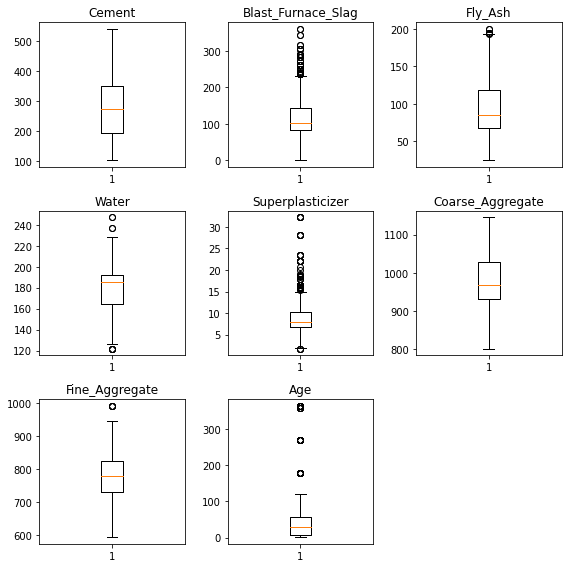

In [14]:
plt.figure(figsize=(8,8))
for i,col in enumerate(data.columns[:8]):
  plt.subplot(3,3,i+1)
  plt.title(col)
  plt.boxplot(data[col])
  plt.tight_layout()

* Age, Superplasticizer,Blast_Furnace_slag features have lot of outliers
* Water, Fly_Ash and Fine_Aggregate have some outliers


#### we cap the outliers using winsorization method

In [15]:
from scipy.stats.mstats import winsorize
winsorize(data['Age'],(0,0.1),inplace=True)
winsorize(data['Superplasticizer'],(0.1,0.1),inplace=True)
winsorize(data['Water'],(0.1,0.1),inplace=True)
winsorize(data['Blast_Furnace_Slag'],(0,0.1),inplace=True)
winsorize(data['Fly_Ash'],(0,0.1),inplace=True)
winsorize(data['Fine_Aggregate'],(0,0.1),inplace=True)

masked_array(data=[676. , 676. , 594. , ..., 780. , 788.9, 761.5],
             mask=False,
       fill_value=1e+20)

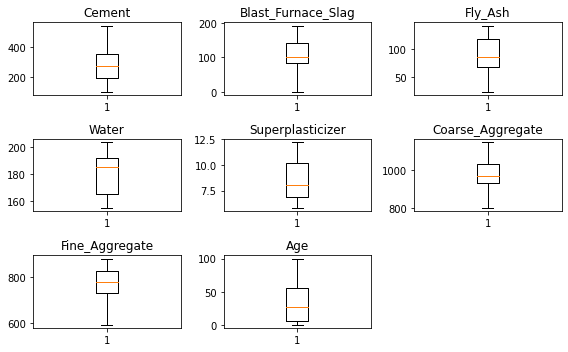

In [16]:
plt.figure(figsize=(8,5))
for i,col in enumerate(data.columns[:8]):
  plt.subplot(3,3,i+1)
  plt.title(col)
  plt.boxplot(data[col])
  plt.tight_layout()

In [17]:
data.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,111.394413,91.245336,180.765136,8.554671,972.918592,770.992184,36.322330,35.817836
std,104.507142,47.910135,28.508639,16.422581,2.103048,77.753818,75.708411,31.773019,16.705679
min,102.000000,0.020000,24.460000,154.610000,5.800000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,84.014348,68.414370,164.900000,6.836897,932.000000,730.950000,7.000000,23.707115
50%,272.900000,102.133541,85.625965,185.000000,8.010493,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,192.000000,141.000000,203.500000,12.200000,1145.000000,880.400000,100.000000,82.599225


#univariate analysis

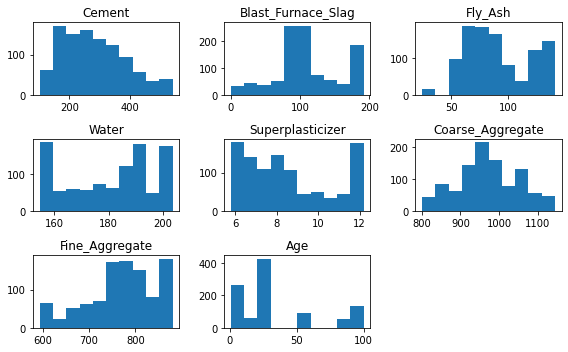

In [18]:
plt.figure(figsize=(8,5))
for i,col in enumerate(data.columns[:8]):
  plt.subplot(3,3,i+1)
  plt.title(col)
  plt.hist(data[col])
  plt.tight_layout()

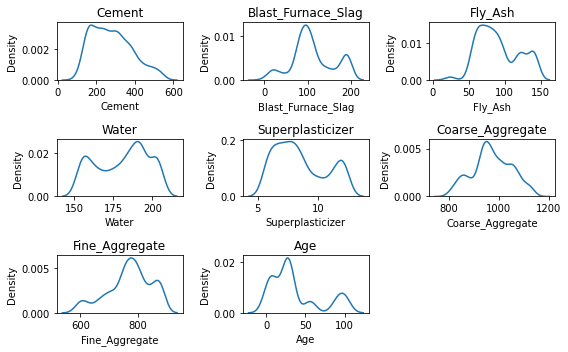

In [19]:
plt.figure(figsize=(8,5))
for i,col in enumerate(data.columns[:8]):
  plt.subplot(3,3,i+1)
  plt.title(col)
  sns.kdeplot(data[col])
  plt.tight_layout()

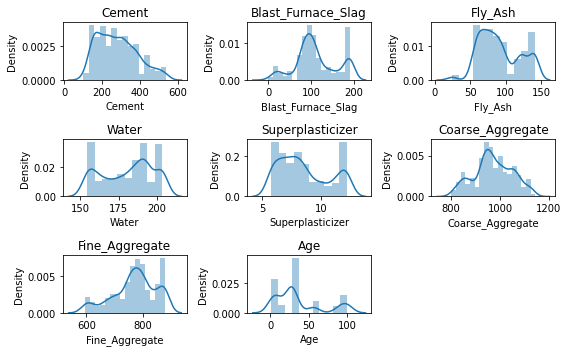

In [20]:
plt.figure(figsize=(8,5))
for i,col in enumerate(data.columns[:8]):
  plt.subplot(3,3,i+1)
  plt.title(col)
  sns.distplot(data[col])
  plt.tight_layout()

In [21]:
from scipy.stats import skew
skw={}
features=['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
         'Coarse_Aggregate', 'Fine_Aggregate', 'Age']
skewness=[]
for col in data.columns[:8]:
  skewness.append(skew(data[col]))

skw={'Features':features,'skewness':skewness}
skw=pd.DataFrame(skw)
skw

,Features,skewness
0,Cement,0.508775
1,Blast_Furnace_Slag,0.159535
2,Fly_Ash,0.349505
3,Water,-0.243497
4,Superplasticizer,0.473646
5,Coarse_Aggregate,-0.040148
6,Fine_Aggregate,-0.527075
7,Age,0.997856


#Observations

* Fine Aggregate features is nearly normal
* Fly_Ash, Age are heavily right tailed skewed distribution
* Cement is slighlty right skewed
* Coarse_Aggregate is heavily left skewed
* Water and Fine_Aggregate is slightly left **skewed**

#Bivariate Analysis

<Figure size 576x576 with 0 Axes>

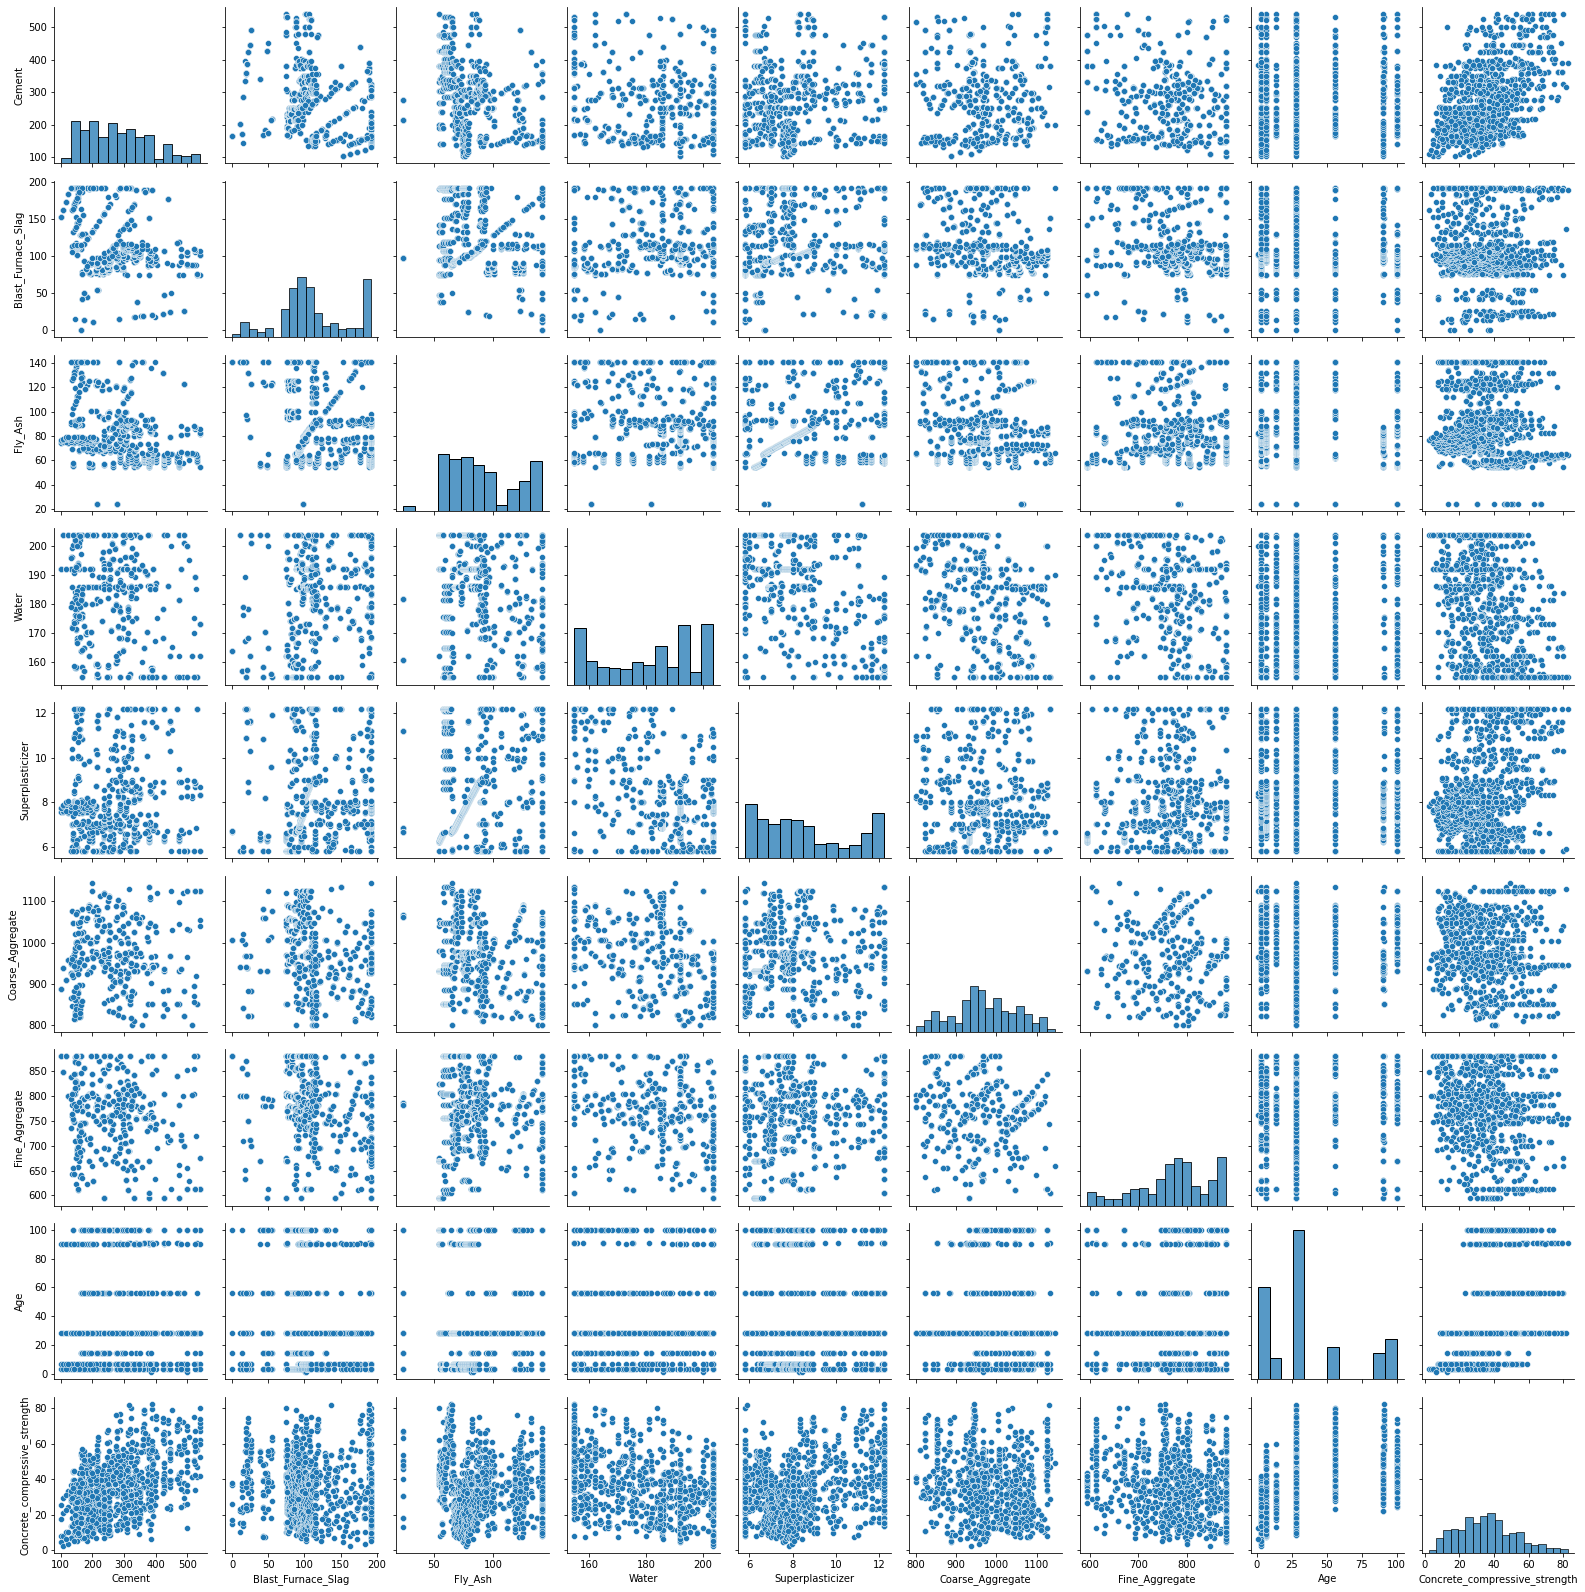

In [22]:
plt.figure(figsize=(8,8))
sns.pairplot(data)

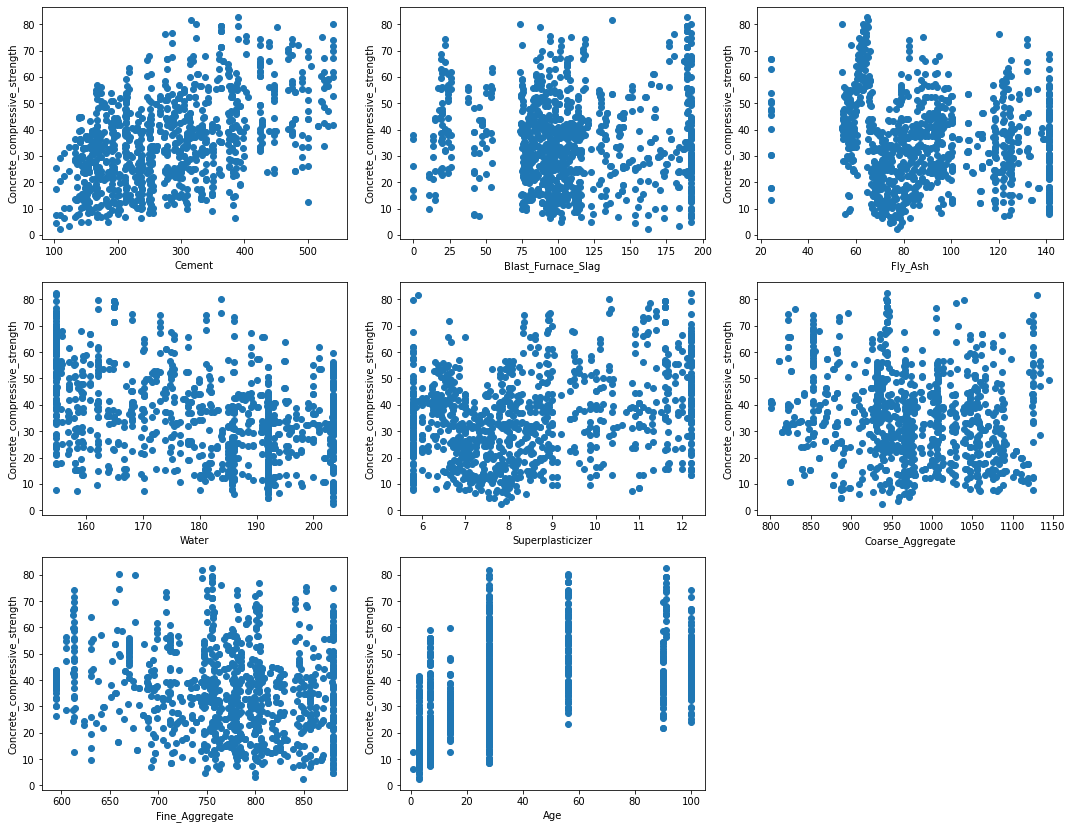

In [23]:
plt.figure(figsize=(15,15))
for i,col in enumerate(data.columns[:8]):
  plt.subplot(4,3,i+1)
  plt.xlabel(col)
  plt.ylabel('Concrete_compressive_strength')
  plt.scatter(data[col],data['Concrete_compressive_strength'])
  plt.tight_layout()

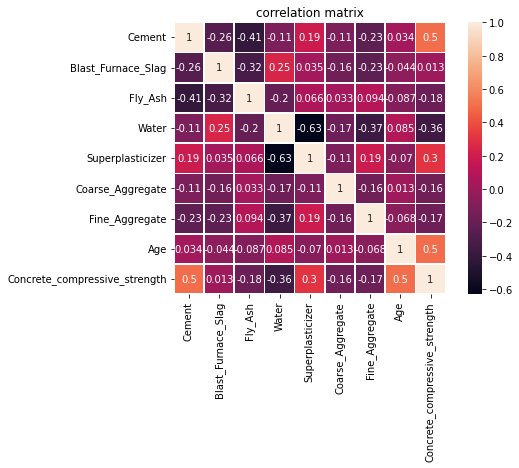

In [24]:
plt.figure(figsize=(8,5))
plt.title('correlation matrix')
sns.heatmap(data.corr(),annot=True,square=True,linewidths=0.5)
plt.show()

groupby, pivottable, crosstab and bar graphs

#observations

* water has slightly strong correlation with superplasticizer 
* None of the features are highly correlated with target variable except cement
* Cement and concrete compressive strength are positively correlated

#Model Fitting

In [25]:
#importing libraries

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


Standardizing the Features

In [26]:
sc=StandardScaler()
x=data.drop('Concrete_compressive_strength',axis=1)
y=data['Concrete_compressive_strength']
x_sc=sc.fit_transform(x)

Splitting the data into train and test

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.2,random_state=123)

Linear Regression

In [28]:
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

Lasso Regression

In [29]:
lasso=Lasso(alpha=1,random_state=123)
lasso.fit(x_train,y_train)

Lasso(alpha=1, random_state=123)

Ridge Regression

In [30]:
ridge=Ridge(alpha=1,random_state=1234)
ridge.fit(x_train,y_train)

Ridge(alpha=1, random_state=1234)

Decision Tree Regressor

In [31]:
clf_tree=DecisionTreeRegressor(random_state=345)

clf_tree.fit(x_train,y_train)

DecisionTreeRegressor(random_state=345)

RandomForestRegression

In [32]:
rf_tree=RandomForestRegressor(random_state=345)

rf_tree.fit(x_train,y_train)

RandomForestRegressor(random_state=345)

KNearestNeighborRegressor

In [33]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

SupportVectorRegression

In [34]:
svr=svm.SVR()

svr.fit(x_train,y_train)

SVR()

In [35]:
def adjusted_R2_score(r2,n,p):
  return 1-(1-r2)*(n-1)/(n-p-1)

#Evaluation of Training data

In [36]:
metrics={}
R2_score=[]
Adjusted_R2_score=[]
Mean_Square_Error=[]
Root_mean_square_error=[]
models=[lr,lasso,ridge,clf_tree,rf_tree,knn,svr]

n=len(x_train)
p=x_train.shape[1]

for model in models:
  r2=r2_score(y_train,model.predict(x_train))
  R2_score.append(r2)
  Adjusted_R2_score.append(adjusted_R2_score(r2,n,p))
  Mean_Square_Error.append(mean_squared_error(y_train,model.predict(x_train)))
  Root_mean_square_error.append(np.sqrt(mean_squared_error(y_train,model.predict(x_train))))


algos=['LinearRegression','Lasso','Ridge','DecisionTreeRegression','RandomForestRegression','KNN','SVR']
metrics={'Algorithms':algos,'R2_Score':R2_score,'Adjusted_R2_score':Adjusted_R2_score,'Mean_Square_Error':Mean_Square_Error,'Root_mean_square_error':Root_mean_square_error}

train_data_evaluation=pd.DataFrame(metrics)

train_data_evaluation

,Algorithms,R2_Score,Adjusted_R2_score,Mean_Square_Error,Root_mean_square_error
0,LinearRegression,0.727727,0.725054,76.174484,8.727800
1,Lasso,0.694557,0.691559,85.454563,9.244164
2,Ridge,0.727723,0.725051,76.175451,8.727855
3,DecisionTreeRegression,0.999206,0.999198,0.222062,0.471234
4,RandomForestRegression,0.986945,0.986817,3.652299,1.911099
5,KNN,0.853567,0.852129,40.968007,6.400626
6,SVR,0.729348,0.726692,75.720863,8.701774


Evaluation of Test data

In [37]:
metrics={}
R2_score=[]
Adjusted_R2_score=[]
Mean_Square_Error=[]
Root_mean_square_error=[]
models=[lr,lasso,ridge,clf_tree,rf_tree,knn,svr]

n=len(x_test)
p=x_test.shape[1]

for model in models:
  r2=r2_score(y_test,model.predict(x_test))
  R2_score.append(r2)
  Adjusted_R2_score.append(adjusted_R2_score(r2,n,p))
  Mean_Square_Error.append(mean_squared_error(y_test,model.predict(x_test)))
  Root_mean_square_error.append(np.sqrt(mean_squared_error(y_test,model.predict(x_test))))


algos=['LinearRegression','Lasso','Ridge','DecisionTreeRegression','RandomForestRegression','KNN','SVR']
metrics={'Algorithms':algos,'R2_Score':R2_score,'Adjusted_R2_score':Adjusted_R2_score,'Mean_Square_Error':Mean_Square_Error,'Root_mean_square_error':Root_mean_square_error}

test_data_evaluation=pd.DataFrame(metrics)

test_data_evaluation

,Algorithms,R2_Score,Adjusted_R2_score,Mean_Square_Error,Root_mean_square_error
0,LinearRegression,0.744062,0.733668,70.240583,8.380965
1,Lasso,0.732368,0.721500,73.449698,8.570280
2,Ridge,0.744211,0.733824,70.199569,8.378518
3,DecisionTreeRegression,0.748980,0.738787,68.890683,8.300041
4,RandomForestRegression,0.888533,0.884006,30.591418,5.530951
5,KNN,0.776058,0.766964,61.459419,7.839606
6,SVR,0.723123,0.711880,75.986969,8.717050


#Hyperparameter tuning

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
#lasso Regression 

params = {'alpha':[i for i in np.arange(0.1,10,0.1)]}

model =Lasso()

model_lasso= GridSearchCV(estimator=model,param_grid=params,verbose=1,return_train_score=True)

model_lasso.fit(x_train,y_train)

model_lasso.best_params_

Fitting 5 folds for each of 99 candidates, totalling 495 fits


{'alpha': 0.1}

In [40]:
#ridge Regression

params = {'alpha':[i for i in np.arange(0.1,10,0.1)]}

model1 =Ridge()

model_ridge= GridSearchCV(estimator=model1,param_grid=params,verbose=1,return_train_score=True)

model_ridge.fit(x_train,y_train)

model_ridge.best_params_

Fitting 5 folds for each of 99 candidates, totalling 495 fits


{'alpha': 2.8000000000000003}

In [41]:
#Decision Tree Regressor
params = {'min_samples_leaf':[i for i in range(5,100,5)],'max_depth':[1,100,5],
          'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'max_features':['auto','sqrt','log2'] }

model2=DecisionTreeRegressor()

model_tree=GridSearchCV(estimator=model2,verbose=1,param_grid=params,return_train_score=True)

model_tree.fit(x_train,y_train)

model_tree.best_params_


Fitting 5 folds for each of 684 candidates, totalling 3420 fits


{'criterion': 'squared_error',
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 5}

In [42]:
#RandomForestRegressor

n_estimators=[1,10,100,200,500]
max_features=['auto','sqrt']
max_depth=[3,6,10]
min_samples_leaf=[1,2,4,10]

random_grid= {'n_estimators': n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_leaf': min_samples_leaf}

model3=RandomForestRegressor()

model_tree1=GridSearchCV(estimator=model3,verbose=1,param_grid=random_grid,return_train_score=True)

model_tree1.fit(x_train,y_train)

model_tree1.best_params_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 500}

In [43]:
#SupportVectorRegression

params = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

model4=svm.SVR()

model_svr=GridSearchCV(param_grid=params,estimator=model4,verbose=1,return_train_score=True)

model_svr.fit(x_train,y_train)

model_svr.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [44]:
rmse_val=[]
rmse_val_test=[]
for k in range(1,20):
  model_knn=KNeighborsRegressor(n_neighbors=k)
  model_knn.fit(x_train,y_train)
  rmse_val.append(np.sqrt(mean_squared_error(y_train,model_knn.predict(x_train))))
  rmse_val_test.append(np.sqrt(mean_squared_error(y_test,model_knn.predict(x_test))))

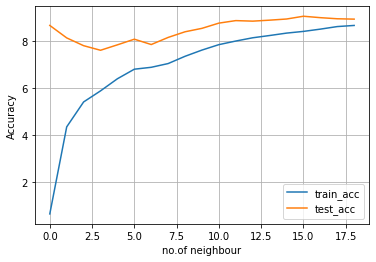

In [45]:
plt.plot(rmse_val)
plt.plot(rmse_val_test)
plt.xlabel('no.of neighbour')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(['train_acc','test_acc'])
plt.show();

optimal number of neighbors for knn regression model k=3

#14. Which algorithm performs better on this dataset and Why?

##using the optimal parameters

In [46]:
#linear regression
lr= LinearRegression()
lr.fit(x_train,y_train)

#lasso regression
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)

#ridge regression
ridge=Ridge(alpha=2.8)
ridge.fit(x_train,y_train)


#decision tree regression
clf_tree=DecisionTreeRegressor(max_depth=100,max_features='auto',min_samples_leaf=5,criterion='squared_error')
clf_tree.fit(x_train,y_train)


#Random Forest Regression
rf_tree=RandomForestRegressor(max_depth=10,max_features='auto',min_samples_leaf=1,n_estimators=500)
rf_tree.fit(x_train,y_train)


#Support Vector Regression
svr=svm.SVR(C=100,gamma=0.1,kernel='rbf')
svr.fit(x_train,y_train)

#KNearest Neighbor Regression
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [47]:
metrics={}
R2_score=[]
Adjusted_R2_score=[]
Mean_Square_Error=[]
Root_mean_square_error=[]
models=[lr,lasso,ridge,clf_tree,rf_tree,knn,svr]

n=len(x_test)
p=x_test.shape[1]

for model in models:
  r2=r2_score(y_test,model.predict(x_test))
  R2_score.append(r2)
  Adjusted_R2_score.append(adjusted_R2_score(r2,n,p))
  Mean_Square_Error.append(mean_squared_error(y_test,model.predict(x_test)))
  Root_mean_square_error.append(np.sqrt(mean_squared_error(y_test,model.predict(x_test))))


algos=['LinearRegression','Lasso','Ridge','DecisionTreeRegression','RandomForestRegression','KNN','SVR']
metrics={'Algorithms':algos,'R2_Score':R2_score,'Adjusted_R2_score':Adjusted_R2_score,'Mean_Square_Error':Mean_Square_Error,'Root_mean_square_error':Root_mean_square_error}

test_data_evaluation=pd.DataFrame(metrics)

test_data_evaluation

,Algorithms,R2_Score,Adjusted_R2_score,Mean_Square_Error,Root_mean_square_error
0,LinearRegression,0.744062,0.733668,70.240583,8.380965
1,Lasso,0.744293,0.733909,70.177007,8.377172
2,Ridge,0.744459,0.734082,70.131483,8.374454
3,DecisionTreeRegression,0.768567,0.759168,63.515365,7.969653
4,RandomForestRegression,0.876208,0.871181,33.973780,5.828703
5,KNN,0.778135,0.769125,60.889319,7.803161
6,SVR,0.866169,0.860734,36.729065,6.060451


In [48]:
feature_importances=pd.DataFrame()

feature_importances['Features']=data.columns[:8]
feature_importances['Support']=rf_tree.feature_importances_

feature_importances.sort_values(by='Support',ascending=False)

,Features,Support
7,Age,0.290691
0,Cement,0.239821
2,Fly_Ash,0.199180
3,Water,0.079409
4,Superplasticizer,0.062305
1,Blast_Furnace_Slag,0.061366
6,Fine_Aggregate,0.036299
5,Coarse_Aggregate,0.030930


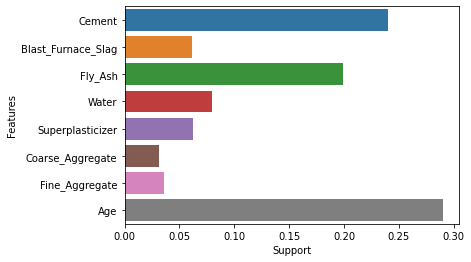

In [49]:
sns.barplot(y=feature_importances['Features'],x=feature_importances['Support'])

### Best model is Random Forest Regression
### Age, Cement and Fly_Ash are the features having more importance in predicting Concrete compressive strength